# Variation of Sample

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [0]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  11.9095195082
sample SD is  5.72861204222


## Empirical Distribution of mean

In [0]:
meanlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())

In [0]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist

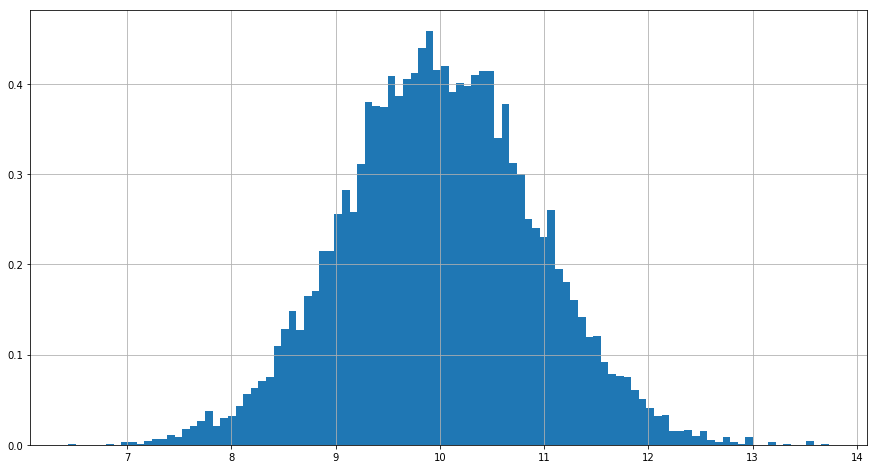

In [0]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

## Sampling from arbritary distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bfbe87470>]], dtype=object)

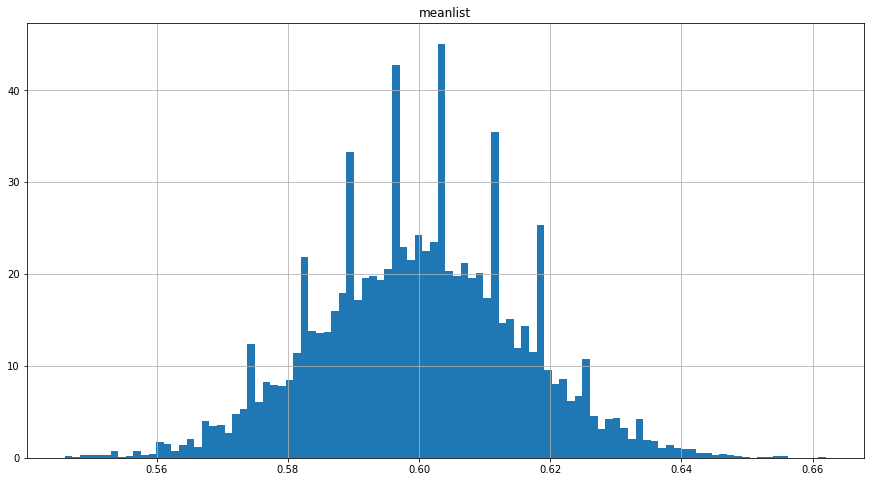

In [0]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 1000
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

In [0]:
import numpy as np

In [0]:
base_ms = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/coursera-python-statistics-financial-analysis/master/dataset/microsoft.csv')

In [5]:
base_ms.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100
5,2015-01-08,46.750000,47.750000,46.720001,47.590000,43.900375,29645200
6,2015-01-09,47.610001,47.820000,46.900002,47.189999,43.531395,23942800
7,2015-01-12,47.419998,47.540001,46.360001,46.599998,42.987129,23651900
8,2015-01-13,46.970001,47.910000,46.060001,46.360001,42.765747,35270600
9,2015-01-14,45.959999,46.240002,45.619999,45.959999,42.396751,29719600


In [7]:
base_ms['logReturn'] = np.log(base_ms['Close'].shift(-1)) - np.log(base_ms['Close'])
base_ms

,Date,Open,High,Low,Close,Adj Close,Volume,logReturn
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994
...,...,...,...,...,...,...,...,...
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.024182
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-0.007925
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,-0.026663
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,-0.042058


In [8]:
np.log(46.759998)

3.845028093832267

In [9]:
np.log(46.450001)

3.8383764867883725

In [10]:
3.845028093832267 - 3.8383764867883725

0.0066516070438944475

In [0]:
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = base_ms['logReturn'].mean()
sample_std = base_ms['logReturn'].std(ddof=1) / (base_ms.shape[0]) ** 0.5

In [0]:
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

In [16]:
print("Sample Mean is", sample_mean)
print("**********************************************")
print("80% confidence interval is")
print(interval_left, interval_right)

Sample Mean is 0.0008202314861230223
**********************************************
80% confidence interval is
0.00016900921195778804 0.0014714537602882566
